# Linear Regression
## <a href="#I">I The theory</a>
## <a href="#II">II Simple Linear Regression with Scikit Learn</a>
### <a href="#II.1">II.1 Preparing the Data</a>
### <a href="#II.2">II.2 Training the Algorithm</a>
### <a href="#II.3">II.3 Making Predictions</a>
### <a href="#II.4">II.4 Evaluating the algorithm</a>
## <a href="#III">III Multiple Linear Regression</a>
### <a href="#III.1">III.1 Preparing the Data</a>
### <a href="#III.2">III.2 Training the Algorithm</a>
### <a href="#III.3">III.3 Making Predictions</a>
### <a href="#III.4">III.4 Evaluating the algorithm</a>

# Linear Regression
<a id="I"></a>
## I The theory

The term "__linearity__" in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line.<br>

Let's consider a scenario where we want to determine the linear relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam. 
If we plot the __independent variable__ (*hours*) on the x-axis and __dependent variable__ (*percentage*) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.<br>

<img src="nbimages/linreg.png" width=300 height=300/>

The equation of a straight line is basically: <br><br>
    $ y = mx + b $ 
<br><br>
Where _b_ is the __intercept__ and _m_ is the __slope__ of the line.<br> 

Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error: it gives us the most optimal value for the intercept and the slope (in two dimensions). 

This same concept can be extended to the cases where there are more than two variables. This is called __multiple linear regression__. <br>
For instance, consider a scenario where you have to predict the price of house based upon its area, number of bedrooms, the age of the house, and so on. In this case the dependent variable is dependent upon several independent variables.<br> 
A regression model involving multiple variables can be represented as a __hyper plane__ (a __plane__ if we are dealing with 2 independent variable only) using an equation like this one:

$ y = b0 + m1b1 + m2b2 + m3b3 + ... + mnbn $
    
<a id="II"></a>
## II Simple Linear Regression with Scikit Learn

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

We will follow the traditional machine learning pipeline, which roughly is:

1. import the data
2. prepare the data
3. transform (scale, standardize, ...) the data 
4. reduce the number of features if needed
5. train the algorithm (if using supervised learning)
6. run the model
6. evaluate the model


In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all" # default is 'last'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('datasets/student_scores.csv')
dataset.head()
dataset.info()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. <br>
From the graph below, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

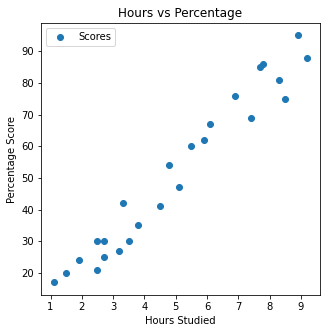

In [3]:
dataset.plot(x='Hours', y='Scores', style='o', figsize=(5,5))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show();

<a id="II.1"></a>
### II.1 Preparing the Data

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<a id="II.2"></a>
### II.2 Training the Algorithm

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

Intercept: 2.02 Slope: 9.91


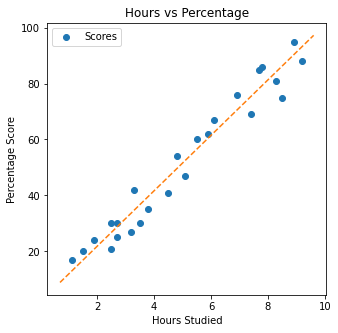

In [7]:
intercept=regressor.intercept_
slope=regressor.coef_[0]
# To see the value of the intercept and slop:
print(f"Intercept: {intercept:.2f} Slope: {slope:.2f}")
# And plot the corresponding line:
dataset.plot(x='Hours', y='Scores', style='o', figsize=(5,5))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
# To plot the line:
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--')
plt.show();

__Conclusion__: if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

<a id="II.3"></a>
### II.3 Making Predictions


In [11]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

<a id="II.4"></a>
### II.4 Evaluating the Algorithm

Here we have only 5 observations, we can, first of all, verify visualy the quality of our predictions with the help of a dataframe.



In [12]:
# compare the actual output values for X_test with the predicted values, execute the following
df=pd.DataFrame({"Actual":y_test, 'Predicted': y_pred})
df['Predicted']=df['Predicted'].apply(np.round)
df

,Actual,Predicted
0,20,17.0
1,27,34.0
2,69,75.0
3,30,27.0
4,62,60.0


Here we are using a regression algorithms, three evaluation metrics are commonly used in this context: Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

You will see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students (i.e. 51.48). This means that our algorithm did a decent job.

In [13]:

# Print some standards metrics:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


<a id="III"></a>
## III Multiple Linear Regression

In the previous section we performed linear regression involving two variables. Almost all real world problems that you are going to encounter will have more than two variables. <br>
Linear regression involving multiple variables is called "__multiple linear regression__".<br> 
The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.<br>

In this example we will try to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.

In [14]:
dataset2 = pd.read_csv('datasets/petrol_consumption.csv')
dataset2.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


<a id="III.1"></a>
### III.1 Preparing the Data

In [16]:
X = dataset2[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset2['Petrol_Consumption']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<a id="III.2"></a>
### III.2 Training the Algorithm

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# To see the coefficients:              
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

LinearRegression()

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


For a unit increase in __petrol_tax__, there is a decrease of 40 million gallons in gas consumption.<br>
Similarly, a unit increase in __proportion of population with a drivers license__ results in an increase of 1.341 billion gallons of gas consumption.<br>
We can see that __Average_income__ and __Paved_Highways__ have a very little effect on the gas consumption.

<a id="III.3"></a>
### III.3 Making Predictions


In [18]:
y_pred = regressor.predict(X_test)

<a id="III.4"></a>
### III.4 Evaluating the Algorithm

Here we still have only few observations, we can, first of all, verify visualy the quality of our predictions with the help of a dataframe and then print the MAE, MSE and RMSE.

You will see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students (i.e. 51.48). This means that our algorithm did a decent job.

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Predicted']=df['Predicted'].apply(np.round)
df
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

,Actual,Predicted
29,534,469.0
4,410,546.0
26,577,590.0
30,571,570.0
32,577,650.0
37,704,647.0
34,487,512.0
40,587,672.0
7,467,502.0
10,580,501.0


Mean Absolute Error: 56.82224747896471
Mean Squared Error: 4666.344787588364
Root Mean Squared Error: 68.3106491521517


The root mean squared error is 68.31, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.<br>

There are many factors that may have contributed to this inaccuracy, a few of which are listed here:

1. __Need more data__: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
2. __Bad assumptions__: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
3. __Poor features__: The features we used may not have had a high enough correlation to the values we were trying to predict.